In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras
from sklearn.preprocessing import StandardScaler

2023-07-19 10:11:03.761137: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-19 10:11:03.871146: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-19 10:11:03.873365: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-19 10:11:05.203294: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# callbacks 解决准确率问题
# fashion_mnist图像分类数据集   60000个样本，每个样本28*28的特征  target 0-9 对应不同衣服种类
fashion_mnist = keras.datasets.fashion_mnist
# 数据加载本地用户.keras文件中
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
# 验证集、训练集
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

In [3]:
std = StandardScaler()
x_train_std = std.fit_transform(x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_std = std.transform(x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_std = std.transform(x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

In [4]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(0.001),
              metrics=["accuracy"])

# Tensorboard, earlystopping, ModelCheckpoint
logdir = './callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)

#模型保存路径
output_model_file = os.path.join(logdir,
                                 "fashion_mnist_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(logdir),#画图使用
    keras.callbacks.ModelCheckpoint(output_model_file,#保存模型的最佳参数
                                    save_best_only = True),
    #大家可以继续调小min_delta，默认监控的指标是验证集的monitor='val_loss'
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2),
]
#没有触发EarlyStopping的话，把epochs改大一些
history = model.fit(x_train_std, y_train, epochs=100,
                    validation_data=(x_valid_std, y_valid),
                    callbacks = callbacks)

Epoch 1/100
1719/1719 [==============================] - 13s 7ms/step - loss: 0.8604 - accuracy: 0.7138 - val_loss: 0.6093 - val_accuracy: 0.7936
Epoch 2/100
  15/1719 [..............................] - ETA: 12s - loss: 0.6587 - accuracy: 0.7833

/home/jiangpeng/.virtualenvs/tf2/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1719/1719 [==============================] - 12s 7ms/step - loss: 0.5767 - accuracy: 0.8007 - val_loss: 0.5178 - val_accuracy: 0.8234
Epoch 3/100
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5115 - accuracy: 0.8219 - val_loss: 0.4764 - val_accuracy: 0.8356
Epoch 4/100
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4757 - accuracy: 0.8340 - val_loss: 0.4514 - val_accuracy: 0.8456
Epoch 5/100
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4518 - accuracy: 0.8420 - val_loss: 0.4337 - val_accuracy: 0.8490
Epoch 6/100
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4338 - accuracy: 0.8481 - val_loss: 0.4201 - val_accuracy: 0.8562
Epoch 7/100
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4200 - accuracy: 0.8523 - val_loss: 0.4094 - val_accuracy: 0.8594
Epoch 8/100
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4081 - accuracy: 0.8566 - val_loss: 0.4018 - val_accurac

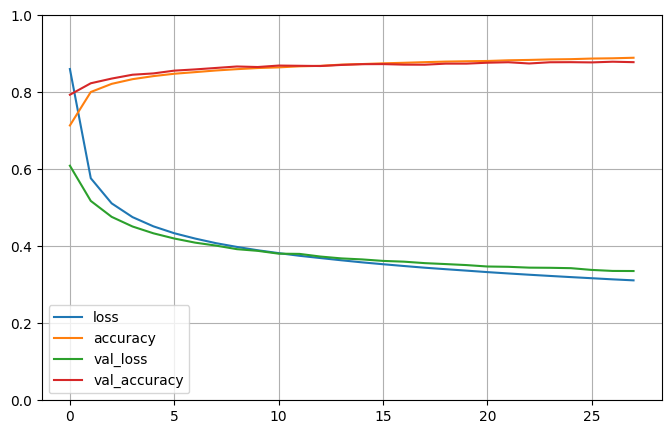

In [5]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()


plot_learning_curves(history)

In [6]:
model.evaluate(x_test_std, y_test, verbose=0)

[0.3738242983818054, 0.8661999702453613]